In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('ex1data1.txt', header = None)
data.columns = ['Population', 'Profit']
data.head

<bound method NDFrame.head of     Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]>

Text(0, 0.5, 'Profit in $10,000s')

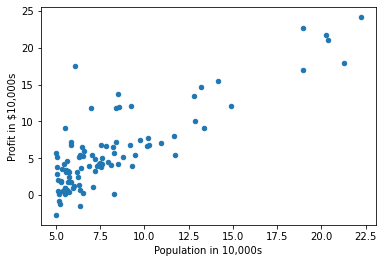

In [3]:
data.plot.scatter('Population', 'Profit')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')

In [4]:
predict = 'Profit'
n = data.shape[0]
X = np.array(data.drop(predict, axis = 1))
X = np.hstack((np.ones((n,1)),X))
y = np.array(data[predict]).reshape(n,1)
theta = np.zeros((2,1)) # column vector
def predictor(X, theta):
    return X.dot(theta)
def compute_cost(X, y, theta):
    m = X.shape[0] # number of observations
    error = predictor(X, theta) - y
    sum_squares = error.T.dot(error).flatten()
    return sum_squares/(2*m)
compute_cost(X,y,theta).flatten()


array([32.07273388])

Text(0, 0.5, 'Cost')

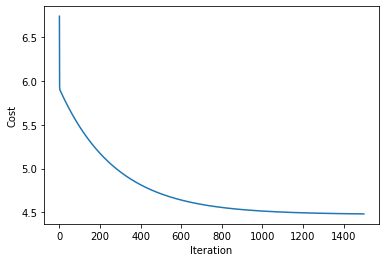

In [5]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    m = X.shape[0] # number of observations
    for i in range(iterations):
        error = predictor(X, theta) - y
        theta -= alpha * error.T.dot(X).T/m 
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta = np.zeros((2,1)) # column vector
alpha = 0.01
iterations = 1500
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')

Text(0.5, 1.0, 'Theta_0 = [-3.63029144], Theta_1 =[1.16636235]')

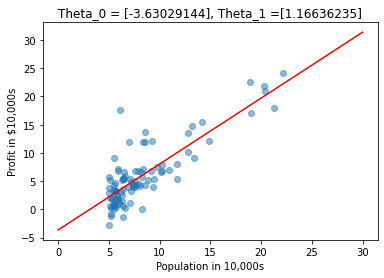

In [6]:
plt.scatter(X[:,1], y, alpha = 0.5)
xmin, xmax = 0, 30
plt.plot([xmin, xmax], np.array([[1,xmin],[1,xmax]]).dot(theta), 'r')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title(f'Theta_0 = {theta[0]}, Theta_1 ={theta[1]}')

4.477842541552719

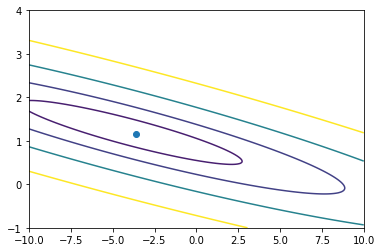

In [12]:
density = 200
theta0_vals = np.linspace(-10, 10, density)
theta1_vals = np.linspace(-1, 4, density)
cost_vals = np.zeros([density, density])

for i in range(density):
    for j in range(density):
        theta_val = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2,1)
        cost_vals[j,i] = compute_cost(X, y, theta_val)
plt.contour(theta0_vals, theta1_vals, cost_vals, levels = np.logspace(-3,2,15))
plt.scatter(theta[0], theta[1])